Starting with only the closing price dataset to see if the model I make actually works or not, then I will make use of the other three datasets if needed. 

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
# Assuming you have the dataset in a CSV file
file_path = '/Users/rafayhaque/Documents/QMind/Stocks_AdjClose_10yr.csv'  
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
df.head()

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Scale the dataset
scaled_data = scaler.fit_transform(df.values)


def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data)-sequence_length):
        x_part = data[i:i+sequence_length]
        y_part = data[i+sequence_length]
        xs.append(x_part)
        ys.append(y_part)
    return np.array(xs), np.array(ys)

# Choose a sequence length
sequence_length = 60  # Number of days to use for prediction. Adjust as needed.

# Create the sequences
X, y = create_sequences(scaled_data, sequence_length)

train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(X.shape[2]))  # The output layer should have the same number of neurons as features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)


loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get actual prices
actual_predictions = scaler.inverse_transform(predictions)
actual_y_test = scaler.inverse_transform(y_test)

2024-01-29 13:59:28.286625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-29 13:59:28.288907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-29 13:59:28.289381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2024-01-29 13:59:28.570593: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-29 13:59:28.706667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-29 13:59:28.707201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-29 13:59:28.707811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

55/56 [============================>.] - ETA: 0s - loss: 0.0516

2024-01-29 13:59:31.578811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-29 13:59:31.579319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-29 13:59:31.580099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

56/56 [==============================] - 3s 36ms/step - loss: 0.0514 - val_loss: 0.0627
Epoch 2/100
56/56 [==============================] - 2s 31ms/step - loss: 0.0091 - val_loss: 0.0441
Epoch 3/100
56/56 [==============================] - 2s 32ms/step - loss: 0.0070 - val_loss: 0.0424
Epoch 4/100
56/56 [==============================] - 2s 33ms/step - loss: 0.0060 - val_loss: 0.0365
Epoch 5/100
56/56 [==============================] - 2s 32ms/step - loss: 0.0046 - val_loss: 0.0342
Epoch 6/100
56/56 [==============================] - 2s 32ms/step - loss: 0.0035 - val_loss: 0.0295
Epoch 7/100
56/56 [==============================] - 2s 32ms/step - loss: 0.0030 - val_loss: 0.0289
Epoch 8/100
56/56 [==============================] - 2s 32ms/step - loss: 0.0028 - val_loss: 0.0264
Epoch 9/100
56/56 [==============================] - 2s 32ms/step - loss: 0.0026 - val_loss: 0.0270
Epoch 10/100
56/56 [==============================] - 2s 32ms/step - loss: 0.0024 - val_loss: 0.0240
Epoch 11/10

2024-01-29 14:02:30.701013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-29 14:02:30.701886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-29 14:02:30.702450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 0s 10ms/step


16/16 [==============================] - 0s 10ms/step
Mean Squared Error: 8491.107442094772
Root Mean Squared Error: 92.14720528640449
Mean Absolute Error: 40.62364929028718


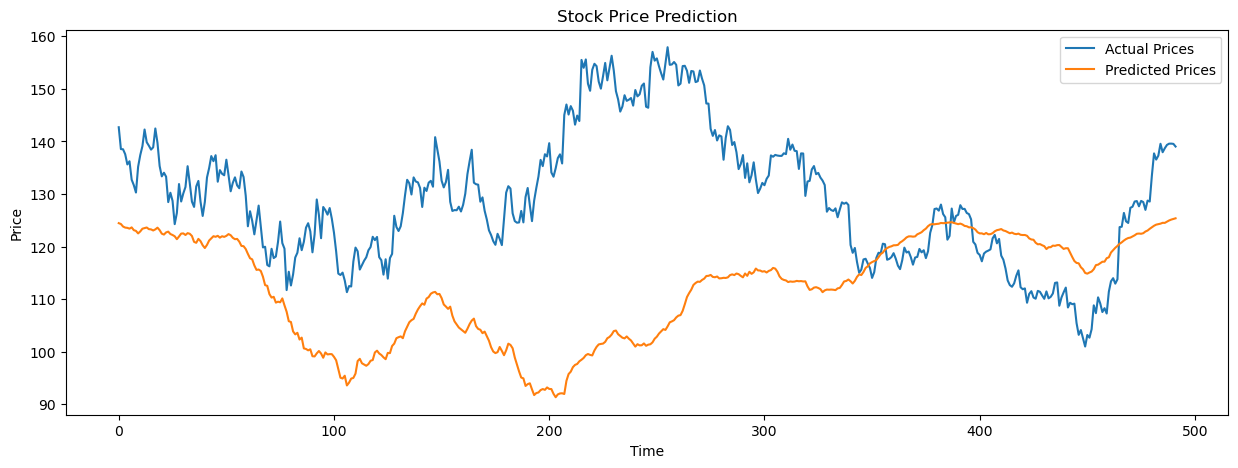

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
predictions = model.predict(X_test)

# Inverse the scaling to get the actual predictions
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test)

# Calculate performance metrics
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

# Plot the real vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(real_prices[:, 0], label='Actual Prices')  # change 0 to the index of the stock you want to plot
plt.plot(predicted_prices[:, 0], label='Predicted Prices')  # change 0 to the index of the stock you want to plot
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NEXT STEPS: Refine this model, try new things, different parameters, find similar models to use and imrpove this, include volume, splits, dividiends as features, scale properly, train more, then check predicitons again.